In [35]:
import pandas
from dateutil import parser
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter
import string

# First Impression Analysis

## Rating Count :

### For Parkman :

In [36]:
df = pandas.read_csv("parkman_trans.csv", sep=";",engine='python' )

<AxesSubplot:xlabel='Review Count', ylabel='Rating'>

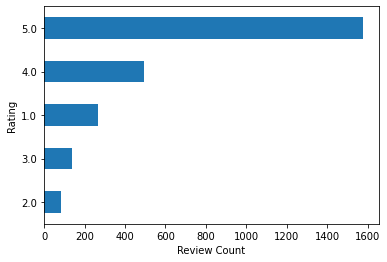

In [37]:
df["rating"]=df["rating"].astype(float)
plt.xlabel("Review Count")
plt.ylabel("Rating")
df.rating.value_counts().sort_values().plot(kind = 'barh',x='Count', y="rating")

### For EasyPark :

In [38]:
df2 = pandas.read_csv("easypark_trans.csv", sep=";",engine='python' )
df2=df2.dropna()

<AxesSubplot:xlabel='Review Count', ylabel='Rating'>

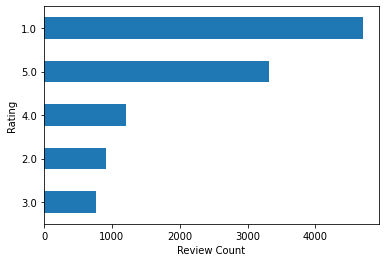

In [39]:
df2["rating"]=df2["rating"].astype(float)
plt.xlabel("Review Count")
plt.ylabel("Rating")
df2.rating.value_counts().sort_values().plot(kind = 'barh')

## Review Year Count :

### For Parkman :

In [40]:
for i in df.index:
    df.at[i, 'date'] = parser.parse(df.at[i, 'date']).date().year

<AxesSubplot:xlabel='Review Count', ylabel='Review Date'>

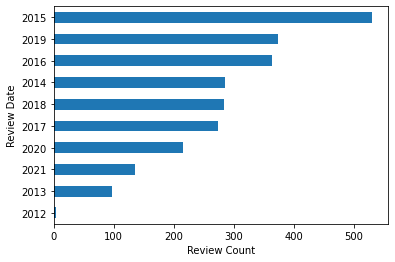

In [41]:
df["date"]=df["date"].astype(int)
plt.xlabel("Review Count")
plt.ylabel("Review Date")
df.date.value_counts().sort_values().plot(kind = 'barh')

### For EasyPark : 

In [42]:
for i in df2.index:
    df2.at[i, 'date'] = parser.parse(df2.at[i, 'date']).date().year

<AxesSubplot:xlabel='Review Count', ylabel='Review Date'>

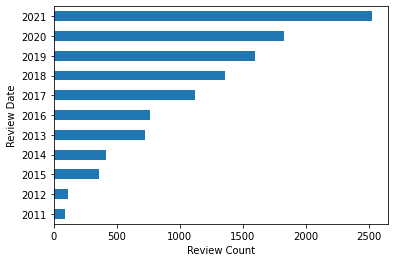

In [43]:
df2["date"]=df2["date"].astype(int)
plt.xlabel("Review Count")
plt.ylabel("Review Date")
df2.date.value_counts().sort_values().plot(kind = 'barh')

## Top 10 Frequent Words 

### For Parkman :

<AxesSubplot:xlabel='Word'>

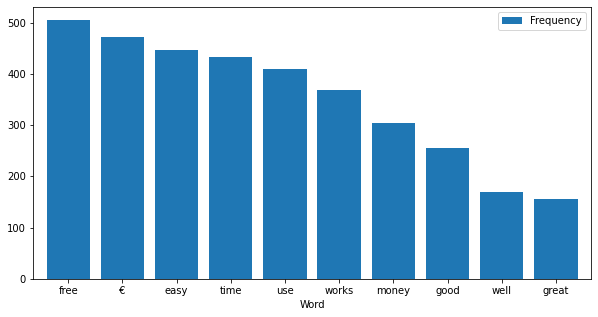

In [44]:
dfEng = pandas.read_csv("/Users/WorkSpace/Desktop/parkman_trans.csv", sep=";")

stopwords = nltk.corpus.stopwords.words('english')
customRemove=['10','parking','get','code','app']
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
dfEng['content'] =dfEng['content'].astype('str')
dfEng['content'] = dfEng['content'].apply(remove_punctuations)
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
RE_custom = r'\b(?:{})\b'.format('|'.join(customRemove))
# replacing '|'-->' ' and droping all stopwords
words = (dfEng.content
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .replace([r'\|', RE_custom], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# Creating new dataframe just for keyword frequency
result = pd.DataFrame(Counter(words).most_common(10),columns=['Word', 'Frequency']).set_index('Word')


# plotting
result.plot.bar(rot=0,figsize=(10,5), width=0.8)

### For easypark

c:\users\workspace\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='Word'>

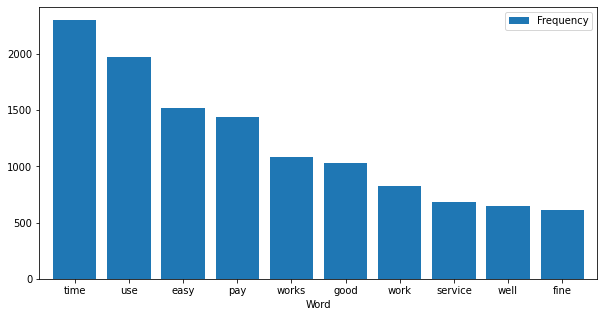

In [45]:
df2Eng = pandas.read_csv("/Users/WorkSpace/Desktop/easyparkTrans.csv", sep=";",error_bad_lines=False)
df2Eng=df2Eng.dropna()

# Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
df2Eng['content'] =df2Eng['content'].astype('str')
df2Eng['content'] = df2Eng['content'].apply(remove_punctuations)

stopwords = nltk.corpus.stopwords.words('english')
customRemove=['10','parking','get','code','app','application','even','one','park','car','easypark']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
RE_custom = r'\b(?:{})\b'.format('|'.join(customRemove))
# replacing '|'-->' ' and droping all stopwords
words = (df2Eng.content
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .replace([r'\|', RE_custom], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# Creating new dataframe just for keyword frequency
result = pd.DataFrame(Counter(words).most_common(10),columns=['Word', 'Frequency']).set_index('Word')

# plotting
result.plot.bar(rot=0,figsize=(10,5), width=0.8)